In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Paths
train_dir = r"C:\Users\deoka\OneDrive\Desktop\DL_dataset\archive\cifar10\cifar10\train"
test_dir  = r"C:\Users\deoka\OneDrive\Desktop\DL_dataset\archive\cifar10\cifar10\test"

# CIFA`R10 Labels
labels = ["airplane","automobile","bird","cat","deer",
          "dog","frog","horse","ship","truck"]

In [2]:
# Load Data
train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(32, 32), batch_size=32,
    class_mode='categorical', subset='training'
)


Found 40000 images belonging to 10 classes.


In [19]:
valid_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(32, 32), batch_size=32,
    class_mode='categorical', subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(32, 32), batch_size=1000, class_mode='categorical', shuffle=False
)

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [21]:
  x_test, y_test = test_generator[0]

In [23]:
# Load VGG16 Model
weights_path = r"C:\Users\deoka\Downloads\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32,32,3))

In [25]:

for layer in base_model.layers:
    layer.trainable = False


In [27]:

# Custom Layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

In [29]:
predictions = Dense(10, activation='softmax')(x)


In [31]:
model = Model(inputs=base_model.input, outputs=predictions)

In [33]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Train ✅ (now using generator correctly)
model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    verbose=1
)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1430s 1s/step - accuracy: 0.4062 - loss: 1.6731 - val_accuracy: 0.5453 - val_loss: 1.3365


In [36]:
###### # Test Prediction
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step


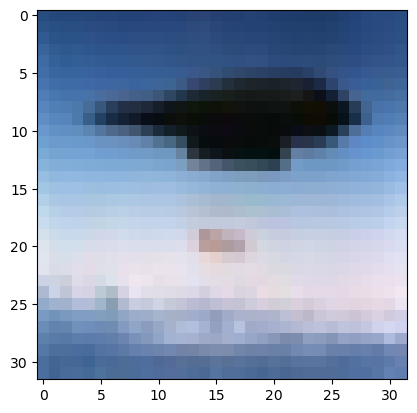

Predicted: airplane
Actual: airplane


In [39]:
# Show sample predictions
n = 800
plt.imshow(x_test[n])
plt.show()
print("Predicted:", labels[np.argmax(predicted_value[n])])
print("Actual:", labels[np.argmax(y_test[n])])


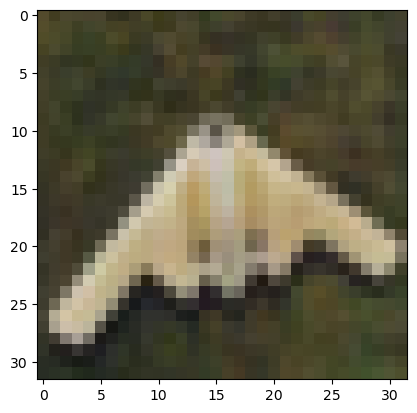

Predicted: bird
Actual: airplane


In [59]:
n = 5
plt.imshow(x_test[n])
plt.show()
print("Predicted:", labels[np.argmax(predicted_value[n])])
print("Actual:", labels[np.argmax(y_test[n])])
